In [31]:
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import os
import cv2



In [32]:

train_df = pd.read_csv('train.csv')
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)

# Load the test data (no labels)
test_df = pd.read_csv('test.csv')
x_test = test_df.values  # Only pixel data

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [33]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])


c:\Users\shivu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [35]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8604 - loss: 0.4655
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9815 - loss: 0.0622
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9894 - loss: 0.0370
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9910 - loss: 0.0282
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9941 - loss: 0.0219


In [36]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


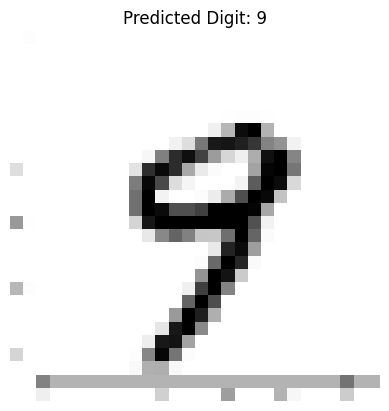

Exiting prediction loop.


In [41]:
while True:
    path = input("Enter image filename (or type 'exit' to quit): ")
    if path.lower() == 'exit':
        print("Exiting prediction loop.")
        break
    if not os.path.isfile(path):
        print("File not found. Please try again.")
        continue

    # Load image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error: Could not load the image.")
        continue

    # Resize to match MNIST input
    img_resized = cv2.resize(img, (28, 28))
    img_normalized = img_resized.astype('float32') / 255.0
    img_input = img_normalized.reshape(1, 28, 28, 1)

    # Predict using the trained model
    prediction = model.predict(img_input)
    predicted_digit = np.argmax(prediction)

    # Show the image and predicted label
    plt.imshow(img_resized, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()